This project provides a classfication of IMDB movie reviews using tensorflow and keras.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import numpy as np


In [ ]:
(train_data,test_data),info = tfds.load('imdb_reviews/subwords8k', split=(tfds.Split.TRAIN,tfds.Split.TEST), as_supervised=True, with_info= True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteY288LT/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteY288LT/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteY288LT/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
encoder = info.features["text"].encoder
encoder

<SubwordTextEncoder vocab_size=8185>

Sample text encoding and decoding 

In [ ]:
sample_text = "hello world"
encoded_text = encoder.encode(sample_text)
decoded_text = encoder.decode(encoded_text)
print("Original Text : {}, Encoded text : {} , Decoded text : {}".format(sample_text, encoded_text, decoded_text))

Original Text : hello world, Encoded text : [3618, 222, 562] , Decoded text : hello world


Code for each text is provided below

In [ ]:
for ts in encoded_text:
  print("{} : {}".format(ts,encoder.decode([ts])))

3618 : hell
222 : o 
562 : world


The code for 1st movie review and the original review is provided below

In [ ]:
for text,label in train_data.take(1):
  print("Code : ",text[0:10].numpy(),"\nReview : ",label.numpy())

Code :  [  62   18   41  604  927   65    3  644 7968   21] 
Review :  0


In [ ]:
encoder.decode(text)

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

Training and Test data is given in batches of BATCH_SIZE and only train data is shuffled.

In [ ]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000
train_batch = (train_data.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE))
test_batch = (test_data.padded_batch(BATCH_SIZE))

In [ ]:
for text,label in train_batch.take(2):
  print(text.shape)
  print(text[0:10].numpy(),label.numpy())

(32, 875)
[[ 661  905 1490 ...    0    0    0]
 [  11    4   33 ...    0    0    0]
 [  12  207 7968 ...    0    0    0]
 ...
 [  62    9    4 ...    0    0    0]
 [  12  393   14 ...    0    0    0]
 [  62   32   70 ...    0    0    0]] [0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0]
(32, 1470)
[[ 133 2412  396 ...    0    0    0]
 [  12 2135   14 ...    0    0    0]
 [ 866 6050    2 ...    0    0    0]
 ...
 [  19 2497   49 ...    0    0    0]
 [3568 5907 7961 ...    0    0    0]
 [  12  258  176 ...    0    0    0]] [1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0]


Preparing the model with embedding, average pooling and 1 dense layer which gives the movie review.

In [ ]:
model = keras.Sequential([
        keras.layers.Embedding(encoder.vocab_size, 16),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(1)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


Loss function and metrics are provided to the model and using optimizer as 'Adam'

In [ ]:
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

Training the model for 10 epochs.

In [ ]:
history = model.fit(train_batch,epochs=10,validation_data=test_batch,validation_steps=20)

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2697 - accuracy: 0.8949 - val_loss: 0.3659 - val_accuracy: 0.8484
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2575 - accuracy: 0.8994 - val_loss: 0.3598 - val_accuracy: 0.8641
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2461 - accuracy: 0.9054 - val_loss: 0.3610 - val_accuracy: 0.8500
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2362 - accuracy: 0.9082 - val_loss: 0.3531 - val_accuracy: 0.8641
Epoch 5/10
782/782 [==============================] - 8s 11ms/step - loss: 0.2263 - accuracy: 0.9130 - val_loss: 0.3516 - val_accuracy: 0.8672
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2189 - accuracy: 0.9165 - val_loss: 0.3514 - val_accuracy: 0.8703
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2107 - accuracy: 0.9191 - val_loss: 0.3532 - val_accuracy: 0.8703

Testing the model with test data and the loss and accuracy for test data are around 0.30 and 87% respectively.

In [ ]:
loss,accuracy = model.evaluate(test_batch)
print("Loss : ",loss)
print("Accuracy : ",accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.3090 - accuracy: 0.8757
Loss :  0.3089921176433563
Accuracy :  0.8757200241088867


Here, we try to plot the accuracy and loss for train and test data in a graph which we got for 10 epochs.

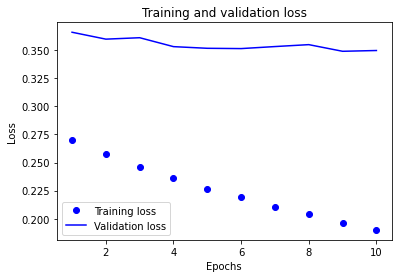

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

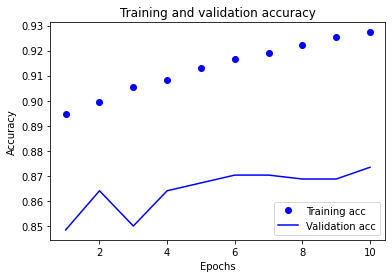

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()